In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.naive_bayes import GaussianNB as GNB

from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.cluster import SpectralClustering
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics

from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score

X = pd.read_csv('CATSnDOGS.csv')
y = pd.read_csv('Labels.csv')
X_array = np.array(X)
y_array = np.reshape(np.array(y),-1)


In [ ]:
def rotate_images(X_array):
    X_rotated = np.copy(X_array)
    ind_images = random.sample(range(0,X.shape[0]),int(X.shape[0]/2))
    for i in range(len(ind_images)):
        tmp = X_array[ind_images[i]]
        tmp = np.rot90(np.reshape(tmp,[64,64]), k=-2)
        X_rotated[ind_images[i],:] = tmp.flatten()
    return X_rotated, ind_images

def split_data(X,y,trainsize = 0.8):
    
    M = np.c_[np.linspace(0, y.shape[0]-1, num=y.shape[0]),y,X]
    np.random.shuffle(M)
    index = M[:,0]
    y = M[:,1]
    X = M[:,2:]

    X_train = X[:int(len(X_array)*trainsize),:]
    X_test = X[int(len(X_array)*trainsize):,:]
    y_train = y[:int(len(X_array)*trainsize)]
    y_test = y[int(len(X_array)*trainsize):]
    index_train = index[:int(len(X_array)*trainsize)]
    index_test = index[int(len(X_array)*trainsize):]

    return X_train,X_test,y_train,y_test,index_train,index_test

def classify(X,y,times = 50):
    acc_knn = []
    f1_knn = []
    test_score_knn = []
    mislabeled_knn = np.zeros(y.shape[0])
    acc_gnb = []
    f1_gnb = []
    test_score_gnb = []
    mislabeled_gnb = np.zeros(y.shape[0])
    for i in range(times):
        X_train,X_test,y_train,y_test,index_train,index_test = split_data(X,y)
        
        knn = KNN() # Change to GNB for GNB
        knn.fit(X_train,y_train) 
        pred = knn.predict(X_test)
        test_score_knn.append(knn.score(X_train,y_train))
        acc_knn.append(accuracy_score(pred,y_test))
        f1_knn.append(f1_score(pred,y_test))
        for i in range(len(pred)):
            if y_test[i] != pred[i]:
                mislabeled_knn[int(index_test[i])] += 1
    
    #########################################################
        knn = GNB() # Change to GNB for GNB
        knn.fit(X_train,y_train) 
        pred = knn.predict(X_test)
        test_score_gnb.append(knn.score(X_train,y_train))
        acc_gnb.append(accuracy_score(pred,y_test))
        f1_gnb.append(f1_score(pred,y_test))
        for i in range(len(pred)):
            if y_test[i] != pred[i]:
                mislabeled_gnb[int(index_test[i])] += 1
    mean_acc_knn = np.mean(acc_knn)
    mean_f1_knn = np.mean(f1_knn)
    mean_test_score_knn = np.mean(test_score_knn)
    mean_acc_gnb = np.mean(acc_gnb)
    mean_f1_gnb = np.mean(f1_gnb)
    mean_test_score_gnb = np.mean(test_score_gnb)
    return mean_acc_knn,mean_f1_knn,mislabeled_knn,mean_acc_gnb,mean_f1_gnb,mislabeled_gnb

In [ ]:
acc_tot_knn = []
f1_tot_knn = []
rot_mislabeled_knn = []
all_X_knn = []
acc_tot_gnb = []
f1_tot_gnb = []
rot_mislabeled_gnb = []
all_X_gnb = []
for i in range(30): 
    print(i)
    X_rotated, ind_images = rotate_images(X_array)
    all_X.append(X_rotated)
    mean_acc_knn,mean_f1_knn,mislabeled_knn,mean_acc_gnb,mean_f1_gnb,mislabeled_gnb = classify(X_rotated,y)
    acc_tot_knn.append(mean_acc_knn)
    f1_tot_knn.append(mean_f1_knn)
    mis_rot_knn = mislabeled[ind_images]
    mis_not_rot_knn = mislabeled[~np.isin(np.linspace(0,197,198),ind_images)]
    a = (mis_rot_knn > 0).sum()
    b = (mis_not_rot_knn > 0).sum()
    rot_mislabeled_knn.append(a/(a+b))

    acc_tot_gnb.append(mean_acc_gnb)
    f1_tot_gnb.append(mean_f1_gnb)
    mis_rot_gnb = mislabeled[ind_images]
    mis_not_rot_gnb = mislabeled[~np.isin(np.linspace(0,197,198),ind_images)]
    a = (mis_rot_gnb > 0).sum()
    b = (mis_not_rot_gnb > 0).sum()
    rot_mislabeled_gnb.append(a/(a+b))

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29


0.6352166666666668
0.5630992785452469
0.48666666666666664
--------------------
0.5932833333333333
0.5990112808343784
0.48666666666666664


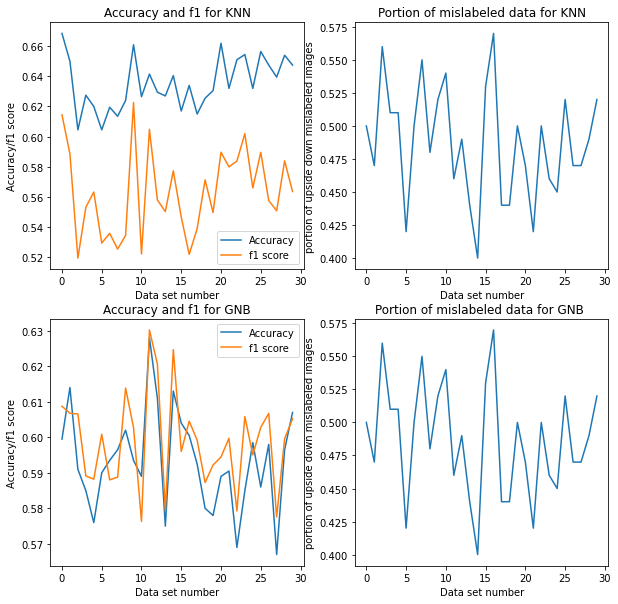

In [ ]:
print(np.mean(acc_tot_knn))
print(np.mean(f1_tot_knn))
print(np.mean(rot_mislabeled_knn))
print("--------------------")
print(np.mean(acc_tot_gnb))
print(np.mean(f1_tot_gnb))
print(np.mean(rot_mislabeled_gnb))
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.title("Accuracy and f1 for KNN")
plt.xlabel("Data set number")
plt.ylabel("Accuracy/f1 score")
plt.plot(acc_tot_knn,label="Accuracy")
plt.plot(f1_tot_knn,label="f1 score")
plt.legend()
plt.subplot(222)
plt.title("Portion of mislabeled data for KNN")
plt.xlabel("Data set number")
plt.ylabel("portion of upside down mislabeled images")
plt.plot(rot_mislabeled_knn)

plt.subplot(223)
plt.title("Accuracy and f1 for GNB")
plt.xlabel("Data set number")
plt.ylabel("Accuracy/f1 score")
plt.plot(acc_tot_gnb,label="Accuracy")
plt.plot(f1_tot_gnb,label="f1 score")
plt.legend()
plt.subplot(224)
plt.title("Portion of mislabeled data for GNB ")
plt.xlabel("Data set number")
plt.ylabel("portion of upside down mislabeled images")
plt.plot(rot_mislabeled_gnb)


### Features#¤#

In [ ]:
acc_tot_knn[10]

0.6265

In [ ]:
df = pd.DataFrame(all_X[20])
df.columns = X.columns
feats = X.columns
selected_all = np.zeros(X_array.shape[1])
selected_VT_SKB = np.zeros(X_array.shape[1])
VT = np.zeros(X_array.shape[1])
SKB = np.zeros(X_array.shape[1])
maxx = 500
for i in range(1):
    sel_1 = VarianceThreshold(threshold = np.sort(np.var(df, axis = 0))[-maxx-1])
    X_new_1 = sel_1.fit_transform(df)
    features_selected_1 = np.array(sel_1.get_feature_names_out())

    sel_2 = SelectKBest(chi2, k=maxx)
    X_new_2 = sel_2.fit_transform(df, y)
    features_selected_2 = np.array(sel_2.get_feature_names_out())


    ft1 = np.isin(feats,features_selected_1)*1
    VT += ft1
    ft2 = np.isin(feats,features_selected_2)*1
    SKB +=ft2
    
    features_selected = ft1 + ft2
    
    best_features = feats[features_selected == 2]
    selected_all += np.isin(feats,best_features)*1

print(features_selected_1)
print(selected_all.sum())

['V1' 'V2' 'V3' 'V4' 'V5' 'V6' 'V7' 'V8' 'V9' 'V10' 'V11' 'V12' 'V13'
 'V14' 'V15' 'V16' 'V17' 'V18' 'V19' 'V20' 'V21' 'V22' 'V23' 'V24' 'V25'
 'V26' 'V27' 'V28' 'V34' 'V37' 'V42' 'V43' 'V44' 'V45' 'V56' 'V57' 'V58'
 'V59' 'V60' 'V61' 'V62' 'V63' 'V64' 'V65' 'V66' 'V67' 'V68' 'V69' 'V70'
 'V79' 'V89' 'V121' 'V122' 'V123' 'V124' 'V125' 'V126' 'V127' 'V128'
 'V129' 'V130' 'V131' 'V188' 'V189' 'V190' 'V191' 'V192' 'V193' 'V194'
 'V251' 'V253' 'V254' 'V255' 'V256' 'V257' 'V318' 'V319' 'V320' 'V321'
 'V382' 'V383' 'V384' 'V385' 'V386' 'V446' 'V447' 'V448' 'V449' 'V511'
 'V512' 'V513' 'V514' 'V575' 'V576' 'V577' 'V578' 'V640' 'V641' 'V642'
 'V702' 'V704' 'V706' 'V707' 'V765' 'V768' 'V769' 'V770' 'V771' 'V829'
 'V830' 'V831' 'V832' 'V833' 'V834' 'V835' 'V893' 'V894' 'V895' 'V896'
 'V897' 'V898' 'V900' 'V901' 'V958' 'V960' 'V961' 'V962' 'V964' 'V965'
 'V1024' 'V1025' 'V1026' 'V1027' 'V1028' 'V1029' 'V1089' 'V1090' 'V1092'
 'V1153' 'V1154' 'V1211' 'V1217' 'V1280' 'V1281' 'V1290' 'V1291' 'V1344'

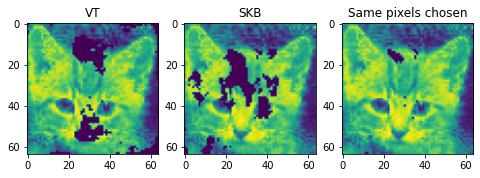

In [ ]:
pic_num = 0
X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_VT = X
X_best_feat_VT[feats[VT != 0]] = 0
X_pic = np.array(X_best_feat_VT)
pic = X_pic[pic_num,:]
pic = np.rot90(np.reshape(pic,[64,64]), k=-1)

X = pd.read_csv('CATSnDOGS.csv')
X_best_feat_SKB = X
X_best_feat_SKB[feats[SKB != 0]] = 0
X_pic = np.array(X_best_feat_SKB)
pic2 = X_pic[pic_num,:]
pic2 = np.rot90(np.reshape(pic2,[64,64]), k=-1)

X = pd.read_csv('CATSnDOGS.csv')
X_best_all = X
X_best_all[feats[selected_all != 0]] = 0
pic3 = np.array(X_best_all)[pic_num,:]
pic3 = np.rot90(np.reshape(pic3,[64,64]), k=-1)

plt.figure(figsize=(8,3))
plt.subplot(131)
plt.title("VT")
plt.imshow(pic)
plt.subplot(132)
plt.title("SKB")
plt.imshow(pic2)
plt.subplot(133)
plt.title("Same pixels chosen")
plt.imshow(pic3)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=98914b02-c3e6-4d22-a781-75e1a0c3af40' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>